## Trabalho Computacional I
___
### Projeto 2: Butterworth por Transformação Bilinear
ENGC63 - 2023.1

**Discentes:** Gabriel S. de Andrade e Fábio B. Braga Santana

In [623]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftfreq
from scipy.io.wavfile import read, write
from IPython.display import display, Math, Audio

### 1. Sinal de Entrada

É interessante conhecermos graficamente os aspectos relacionados ao sinal de entrada tais como sua waveform, resposta em frequência e espectograma. 

#### 1.1. Waveform

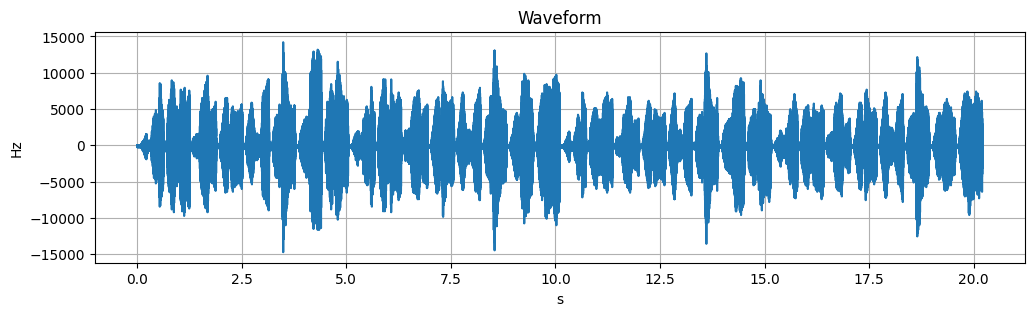

In [624]:
# Define o caminho do arquivo de áudio a ser processado
audio_path = 'flute.wav'

# Faz a leitura do arquivo de áudio e coleta a taxa de amostragem e os dados
(sample_rate, samples) = read(audio_path)

# Tamanho do sinal
signal_length = len(samples)

# Período de amostragem do sinal entre 0 e signal_length
period = np.linspace(0, signal_length / sample_rate, signal_length)

# Plota o gráfico do sinal de entrada
plt.figure(figsize=(12, 3))
plt.plot(period, samples)
plt.title('Waveform')
plt.xlabel('s')
plt.ylabel('Hz')
plt.grid(True)
plt.show()

# Exibe o player de audio
Audio(audio_path)



#### 1.2. Resposta em Frequência

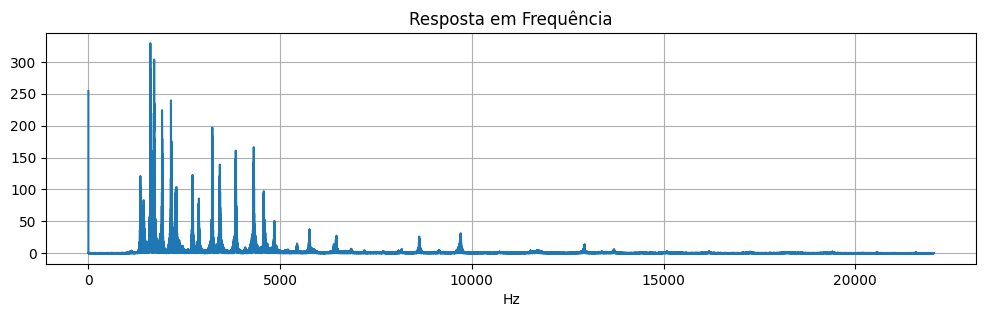

In [625]:
# Vetor contendo os coeficientes da transformada de fourier do sinal
samples_fft = fft(samples)[:signal_length//2]
magnitude_fft = np.abs(samples_fft)[:signal_length//2]

# frequências positivas correspondentes aos coeficientes da transformada de Fourier do sinal de áudio. 
# Essas frequências são calculadas com base no tamanho do sinal e na frequência de amostragem.
frequency_fft = fftfreq(signal_length, T)[:signal_length//2]

# Plota o gráfico da resposta em frequência do sinal de entrada
plt.figure(figsize=(12, 3))
plt.plot(frequency_fft, (2.0/signal_length) * magnitude_fft)
plt.title('Resposta em Frequência')
plt.xlabel('Hz')
plt.grid(True)
plt.show()


#### 1.3. Espectograma

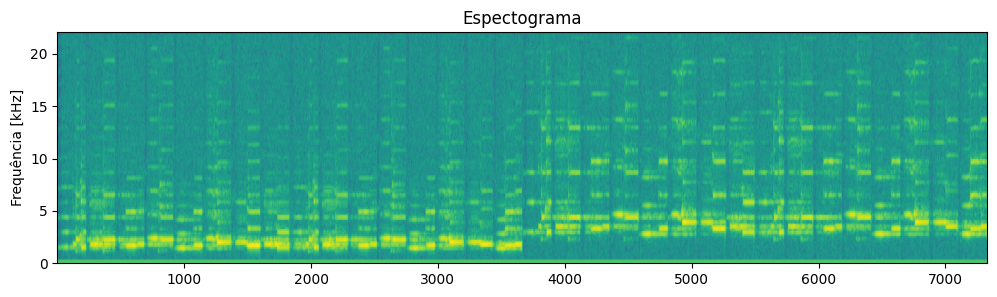

In [626]:
plt.figure(figsize=(12, 3))
plt.specgram(samples, Fs=fs/1000, sides='onesided')
plt.title('Espectograma')
plt.ylabel('Frequência [kHz]')
plt.show()

### 2. Butterworth

#### 2.1. Especificações do projeto de filtro

In [627]:
# Frequência de corte [rad/amostra]
Wc = 2 * np.pi / 3

# Frequência de amostragem [Hz]
Fs = 44100

# Frequência de corte [Hz]
Fc = round(Fs * Wc / (2 * np.pi))

# Ordem do filtro Butterworth
N = 6

#### 2.2. Implementação do filtro

In [628]:
# Criação do filtro Butterworth
b, a = signal.butter(N, Wc * Fs, btype='lowpass', analog=True, output='ba')

# Filtro Butterworth analógico e discreto por transformação bilinear
butterworth_analog = signal.lti(b, a)
butterworth_discrete = signal.dlti(*signal.bilinear(b, a, fs=Fs))

# Resposta em frequência do filtro Butterworth
Wz, Hz = signal.freqz(butterworth_discrete.num, butterworth_discrete.den, worN=Fs)
Ws, Hs = signal.freqs(butterworth_analog.num, butterworth_analog.den, worN=Fs * Wz)

#### 2.3. Resposta em frequência

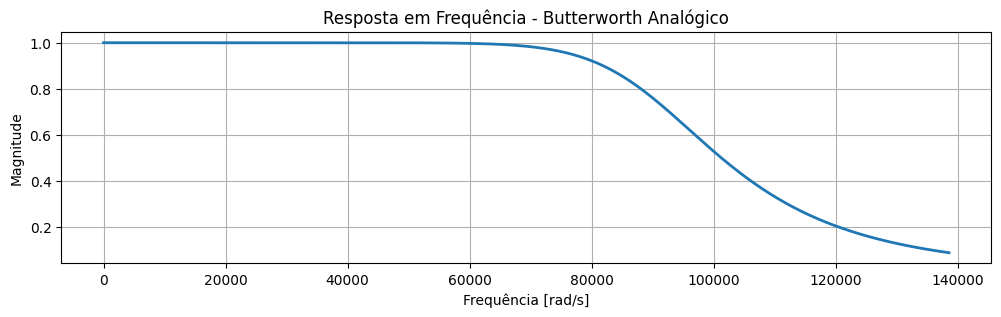

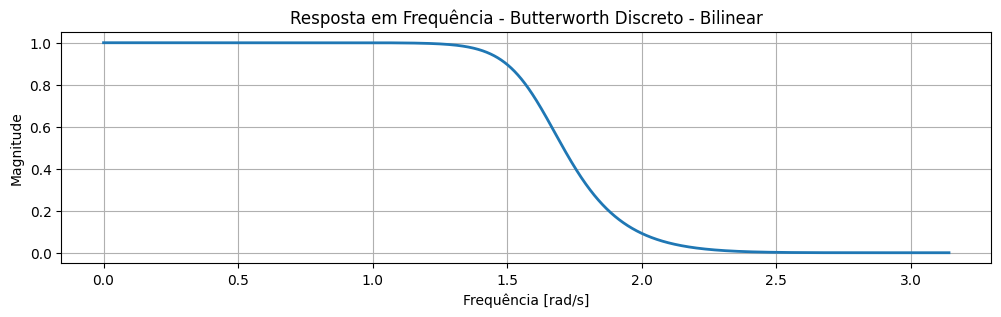

In [629]:
# Plota o gráfico de resposta em frequência do filtro Butterworth analógico
plt.figure(figsize=(12, 3))
plt.plot(Ws, np.abs(Hs), linewidth=2)
plt.title('Resposta em Frequência - Butterworth Analógico')
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# Plota o gráfico de resposta em frequência do filtro Butterworth discreto
plt.figure(figsize=(12, 3))
plt.plot(Wz, np.abs(Hz), linewidth=2)
plt.title('Resposta em Frequência - Butterworth Discreto - Bilinear')
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


#### 2.4. Diagrama de polos e zeros

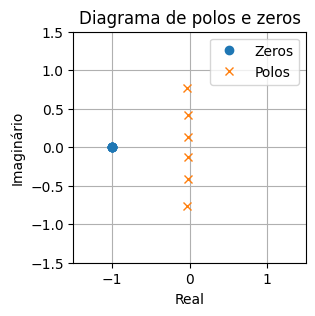

In [630]:
# Plota o diagrama de polos e zeros
plt.figure(figsize=(3, 3))
plt.plot(butterworth_discrete.zeros.real, butterworth_discrete.zeros.imag, 'o', label='Zeros')
plt.plot(butterworth_discrete.poles.real, butterworth_discrete.poles.imag, 'x', label='Polos')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.legend()
plt.title("Diagrama de polos e zeros")
plt.xlabel("Real")
plt.ylabel("Imaginário")
plt.grid(True)
plt.show()

#### 2.5. Magnitude

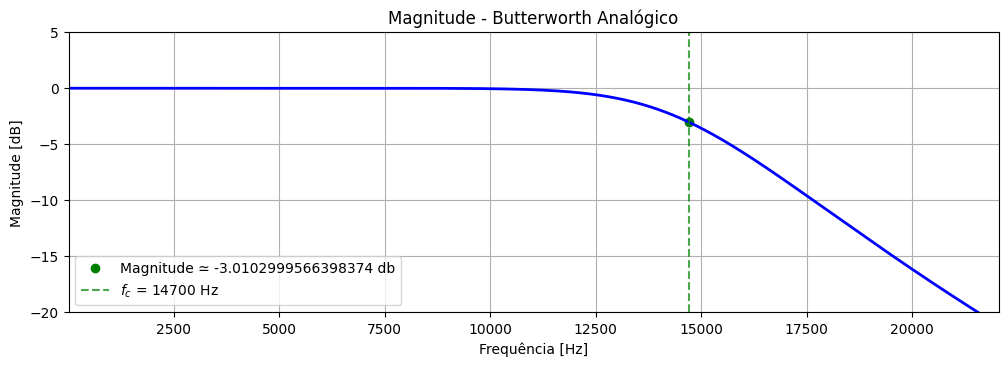

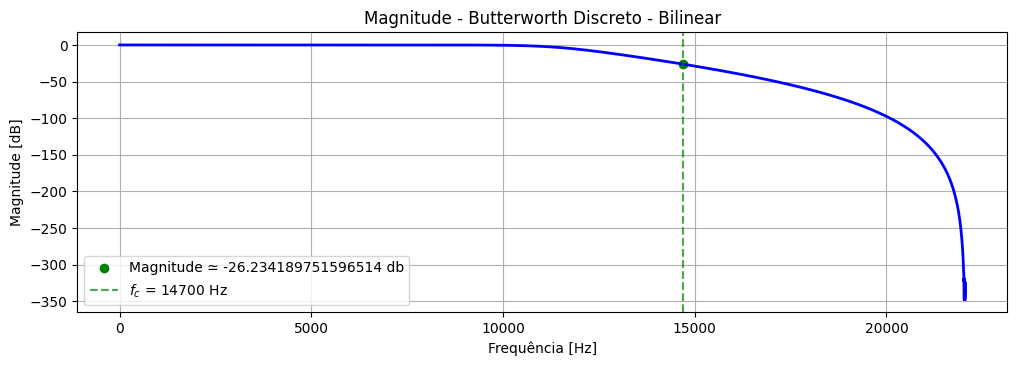

In [631]:
# Calcula a magnitude do filtro analógico e discreto em dB
butterworth_analog_magnitude = 20 * np.log10(abs(Hs))
butterworth_discrete_magnitude = 20 * np.log10(abs(Hz))

# Calcula a frequência do filtro discreto em Hz
Wz_frequency = Wz * Fs / (2 * np.pi)

# Magnitude na frequência de corte
Fc_analog_magnitude = butterworth_analog_magnitude[round(Fc / (Wz_frequency[1] - Wz_frequency[0]))]
Fc_discrete_magnitude = butterworth_discrete_magnitude[round(Fc / (Wz_frequency[1] - Wz_frequency[0]))]

# Plota o gráfico de Magnitude para Butterworth Analógico
plt.figure(figsize=(12, 8))
subplot = plt.subplot(2, 1, 1)
subplot.plot(Fc, Fc_analog_magnitude, 'go', label=f"Magnitude ≃ {Fc_analog_magnitude} db")
subplot.plot(Wz_frequency, butterworth_analog_magnitude, 'b', linewidth=2)
subplot.axis([1, fs / 2, -20, 5])
subplot.set_title("Magnitude - Butterworth Analógico")
subplot.set_xlabel("Frequência [Hz]")
subplot.set_ylabel("Magnitude [dB]")
subplot.grid()
plt.axvline(x=Fc, color="green", ls="--", label="$f_c$ = {} Hz".format(round(Fc)), alpha=0.7)
plt.legend()
plt.show()

# Plota o gráfico de Magnitude para Butterworth Discreto
plt.figure(figsize=(12, 8))
subplot = plt.subplot(2, 1, 1)
subplot.plot(Fc, Fc_discrete_magnitude, 'go', label=f"Magnitude ≃ {Fc_discrete_magnitude} db")
subplot.plot(Wz_frequency, butterworth_discrete_magnitude, 'b', linewidth=2)
subplot.set_title("Magnitude - Butterworth Discreto - Bilinear")
subplot.set_xlabel("Frequência [Hz]")
subplot.set_ylabel("Magnitude [dB]")
subplot.grid()
plt.axvline(x=Fc, color="green", ls="--", label="$f_c$ = {} Hz".format(round(Fc)), alpha=0.7)
plt.legend()
plt.show()

### 3. Filtragem

#### 3.1. Cascata

##### 3.1.1. Precisão infinita

##### 3.1.2. Precisão finita de 5 casas decimais

##### 3.1.3. Precisão finita de 3 casas decimais

#### 3.2. Direta

In [632]:
def direct_form(signal, b, a):
    # Ordem dos coeficientes do filtro
    M = len(b)
    N = len(a)

    # Construindo o sinal de saída
    y = np.zeros(len(signal))

    for n in range(len(signal)):

        # Somatório dos produtos dos coeficientes b e da entrada
        for i in range(M):
            if n - i >= 0:
                y[n] += b[i] * signal[n - 1]
        
        # Somatório dos produtos dos coeficientes a e da saída
        for j in range(N):
            if n - j >= 0:
                y[n] -= a[j] * signal[n - j]

    return y

##### 3.2.1. Precisão infinita

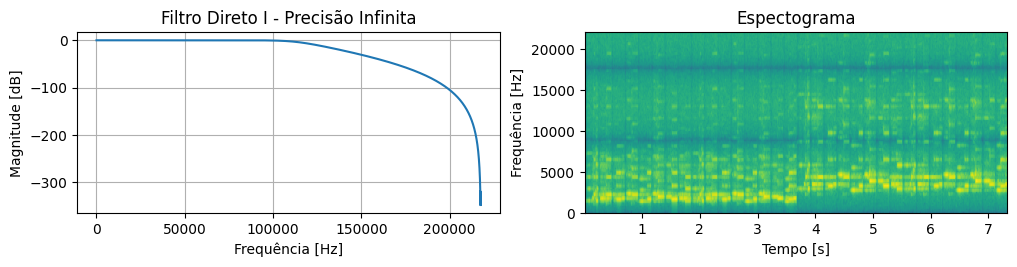

In [633]:
filtered_direct_form_infinity = direct_form(samples, b, a)

plt.figure(figsize=(12,8))

# Plota gráfico de magnitude do sinal filtrado
plt.subplot(3, 2, 1)
plt.plot(Wz * Fs / 2 * np.pi, butterworth_discrete_magnitude, label=r'$|H_z(e^{j \omega})|$')
plt.title('Filtro Direto I - Precisão Infinita')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)

# Plota espectograma do sinal filtrado
plt.subplot(3, 2, 2)
plt.specgram(filtered_direct_form_infinity, Fs=Fs, sides='onesided')
plt.title('Espectograma')
plt.xlabel('Tempo [s]')
plt.ylabel('Frequência [Hz]')

plt.show()

Audio(filtered_direct_form_infinity, rate=sample_rate)

##### 3.2.2. Precisão finita de 5 casas decimais

##### 3.2.3. Preciasão finita de 3 casas decimais

##### 3.2.4. Transformação $Z^{-1} = -z^{-1}$

In [634]:
def transform_1st(b, a):
    transformed_b = []
    transformed_a = []

    for i, value in enumerate(b):
        if i % 2 == b.shape[0] % 2:
            transformed_b.append(-value)
        else:
            transformed_b.append(value)

    for i, value in enumerate(a):
        if i % 2 == a.shape[0] % 2:
            transformed_a.append(-value)
        else:
            transformed_a.append(value)

    return transformed_b, transformed_a


In [635]:
# Aqui vai o código que filtra o audio e plota os gráficos de magnitude e espectograma

##### 3.2.4. Transformação $Z^{-1} = z^{-2}$

In [636]:
def transform_2nd(b, a):
    transformed_b = []
    transformed_a = []

    for coef_b in b:
        transformed_b.append(coef_b)
        transformed_b.append(0)

    for coef_a in a:
        transformed_a.append(coef_a)
        transformed_a.append(0)

    transformed_b = np.array(transformed_b[:-1])
    transformed_a = np.array(transformed_a[:-1])

    return transformed_b, transformed_a

In [637]:
# Aqui vai o código que filtra o audio e plota os gráficos de magnitude e espectograma

##### 3.2.6. Transformação $Z^{-1} = -z^{-2}$

In [638]:
def transform_3rd(b, a):
    return transform_2nd(*transform_1st(b, a))

In [639]:
# Aqui vai o código que filtra o audio e plota os gráficos de magnitude e espectograma